# Episodic memory.

#### Model and agent loading

In [1]:
from goodai.src.models import OpenSourceModel, Agent

In [2]:
model_name = "mistralai/Mixtral-8x7B-Instruct-v0.1"

In [3]:
model = OpenSourceModel(model_name)
agent = Agent(model)

[2024-03-01 00:42:42,150]:[root]:[INFO]: connection to session database established.
[2024-03-01 00:42:42,157]:[sentence_transformers.SentenceTransformer]:[INFO]: Load pretrained SentenceTransformer: sentence-transformers/all-mpnet-base-v2


First let's start with a clean ``session``, a session is a combinations of interactions with the ``agent``, these interactions are saved in a local ``sqlite`` database in order to preserve them, if we start a new session all information provided to the ``agent`` will be lost.

In [4]:
agent.new_session()

[2024-03-01 00:42:49,318]:[root]:[INFO]: Cleared session database.


Now, let's provide our ``agent`` with some informations.

In [5]:
agent.interact("Hello, there my first name is Yassine.")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

"Hi Yassine! It's nice to meet you. How can I assist you today?"

*Agent*: "Hi Yassine! It's nice to meet you. How can I assist you today?"

In [6]:
agent.interact("recall that my last name is Elkhadiri.")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

'Hello Yassine Elkhadiri, nice to meet you!'

*Agent*: 'Hello Yassine Elkhadiri, nice to meet you!'

Now let's mimic the end of our conversation by deleting the ``agent`` this will save our interactions in the database so the ``agent`` can keep track of past interactions.

In [7]:
del agent

[2024-03-01 00:43:02,388]:[root]:[INFO]: Memories saved in local session database


We can double check that our interactions are saved by checking the content of the database.

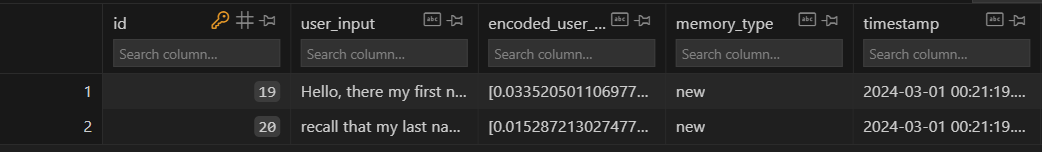

Now by creating a new instance of the ``agent``, it's ``memory manager`` will retrieve the past conversations we had and use it to provide context to the agent.

In [8]:
agent = Agent(model)

[2024-03-01 00:43:03,015]:[root]:[INFO]: connection to session database established.
[2024-03-01 00:43:03,021]:[sentence_transformers.SentenceTransformer]:[INFO]: Load pretrained SentenceTransformer: sentence-transformers/all-mpnet-base-v2


In [9]:
agent.interact("Do you recall my name?")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

'Yes, your first name is Yassine and your last name is Elkhadiri.'

*Agent*: 'Yes, your first name is Yassine and your last name is Elkhadiri.'


This is achieved by augmenting the ``agent`` prompt:

You are an AI chatbot designed to interact with a user and help them with their requests.
Users may interact with you to provide information or ask you about something they already told you.
Your goal is to help the user and interact with them kindly.
Please respond only based on the input you receive from the user
and please provide only your response without the reasoning behind it.
If you don't know the answer to a user question, simply reply with 'I don't know.'.


These are recent interactions the user had with you: ['Hello, there my first name is Yassine.', 'recall that my last name is Elkhadiri.']


These are the most relevant interactions to the provided user input: ['recall that my last name is Elkhadiri.', 'Hello, there my first name is Yassine.']


And this is the user input: Do you recall my name?